In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


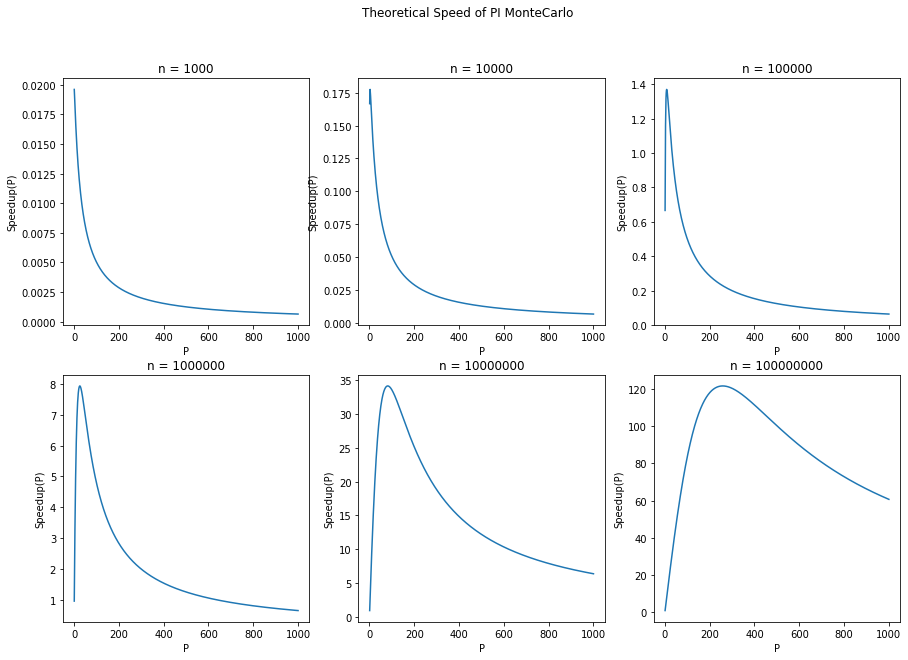

In [13]:
#Plotting theoretical speedup for serial sum parallel algorithm

P = linspace(1,1000,1000)
n = {3,4,5,6,7,8}
T_comp = 2*10e-9
T_read = 10e-4
T_comm = 1.5*10e-6

def Speedup(x,r,T_comp,T_read,T_comm):
    T_P = T_read + T_comm * 2 * (x - 1) + T_comp * (1 + r/x)
    T_1 = r * T_comp
    return T_1/T_P

fh = figure(figsize=(15,10))
fh.suptitle("Theoretical Speed of PI MonteCarlo")
for i in n:
    ax = fh.add_subplot(2,3,i-2)
    ax.set_title("n = " + str(10**i))
    ax.set_xlabel("P")
    ax.set_ylabel("Speedup(P)")
    plot(P,Speedup(P,10**i,T_comp,T_read,T_comm))
    
fh.savefig("foo.png")

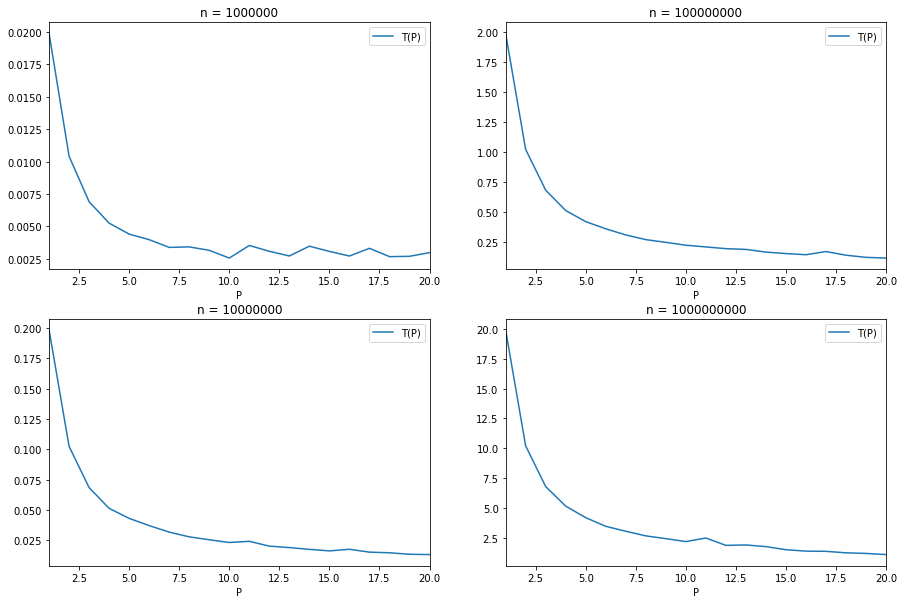

<Figure size 1080x720 with 0 Axes>

In [63]:
#Strong scaling plots
import pandas

df = pandas.read_csv('mpi-pi.csv',
                     delimiter=";",
                     float_precision='round_trip',
                    names=['Rank', 'P', 'T(P)','N'])

#print(df)
#We extract the maximum walltime for every P for a fixed N
idx = df.groupby(['N','P'])['T(P)'].transform(max) == df['T(P)']
strong_df = df[idx]

#print(strong_df)


counter = 0
fh, axes = subplots(nrows=2, ncols=2)
fh = figure(figsize=(15,10))
fh.suptitle("Strong Scaling")
for i in strong_df.N.unique():
    #ax = fh.add_subplot(2,2,counter)
    k_df = strong_df.loc[strong_df['N'] == i]
    k_df = k_df.astype(float)
    k_df.plot(figsize=(15,10), x = 'P', y = 'T(P)', title="n = " + str(i), ax=axes[counter%2, counter//2])
    counter += 1
    
    #plt = k_df.plot(x = 'P', y = 'T(P)', kind='scatter', title="n = " + str(i))
    #counter += 1
    #savefig("plt.pdf")
#savefig("plt.png")


In [12]:
#Parallel overhead estimation for 1 processor, different values of n
usr_serial = np.array([0.003,0.021,0.197,1.966,19.665])
usr_paral = np.array([1.147,1.172,1.342,3.124,21.011])
usr_diff = usr_paral - usr_serial

usr_diff
mean(usr_diff)


1.1888

     Rank   P        T(P)           N
1       0   2    10.42581     1000000
5       2   3     6.90603     1000000
6       0   4     5.22494     1000000
14      4   5     4.34804     1000000
15      0   6     3.73793     1000000
..    ...  ..         ...         ...
755     5  16  1442.15298  1000000000
782    16  17  1376.79005  1000000000
783     0  18  1413.40685  1000000000
801     0  19  1221.92311  1000000000
825     5  20  1170.28785  1000000000

[77 rows x 4 columns]
     Rank   P        T(P)           N
2       1   2    10.41889     1000000
4       1   3     6.84500     1000000
7       1   4     5.18703     1000000
11      1   5     4.30107     1000000
16      1   6     3.59082     1000000
..    ...  ..         ...         ...
761    11  16  1440.70601  1000000000
770     4  17  1356.57477  1000000000
786     3  18  1287.71400  1000000000
802     1  19  1212.32295  1000000000
821     1  20  1153.75805  1000000000

[76 rows x 4 columns]


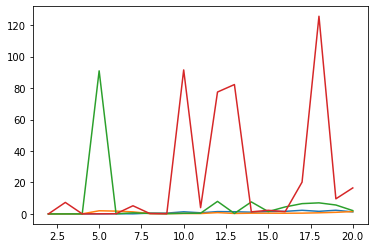

In [59]:
#Parallel overhead plots: still have more than one doubt. #TODO: plot p-practicalspeedup

df = pandas.read_csv('mpi-pi.csv_out',
                     delimiter=";",
                     float_precision='round_trip',
                    names=['Rank', 'P', 'T(P)','N'])

#print(df)

#We extract the maximum walltime for every P for a fixed N
idx = df.groupby(['N','P'])['T(P)'].transform(max) == df['T(P)']
strong_df = df[idx]
strong_df = strong_df.loc[strong_df['P'] != 1]
print(strong_df)

#We also extract the walltime of the master for a fixed N
#master_df = df.loc[df['Rank'] == 0]

#print(master_df)

#Or we extract the minimum walltime
idx_2 = df.groupby(['N','P'])['T(P)'].transform(min) == df['T(P)']
master_df = df[idx_2]
master_df = master_df.loc[master_df['P'] != 1]
print(master_df)


for i in strong_df.N.unique():
    k_strong_df = strong_df.loc[strong_df['N'] == i]
    k_master_df = master_df.loc[master_df['N'] == i]
    k_strong_df = k_strong_df[['P','T(P)']].drop_duplicates()
    k_master_df = k_master_df[['P','T(P)']].drop_duplicates()
    k_strong_ar = k_strong_df['T(P)'].values
    k_master_ar = k_master_df['T(P)'].values
    k_diff = k_strong_ar - k_master_ar
    procs = linspace(2,20,19)
    #print(k_diff)
    plot(procs, k_diff)




     Rank   P        T(P)           N
0       1   1  1985.73709   100000000
1       0   2  2055.17387   200000000
4       1   3  2040.45296   300000000
8       2   4  2050.31991   400000000
14      4   5  2106.59289   500000000
15      0   6  2105.12900   600000000
21      0   7  2167.67406   700000000
28      0   8  2204.66113   800000000
44      8   9  2354.26998   900000000
45      0  10  2237.07891  1000000000
55      0  11  2308.15911  1100000000
66      0  12  2309.21984  1200000000
83      5  13  2306.96797  1300000000
91      0  14  2422.61696  1400000000
114     9  15  2397.12310  1500000000
124     4  16  2308.89678  1600000000
136     0  17  2373.09504  1700000000
153     0  18  2423.00200  1800000000
175     4  19  2324.44811  1900000000
190     0  20  2423.37990  2000000000


<Figure size 1080x720 with 0 Axes>

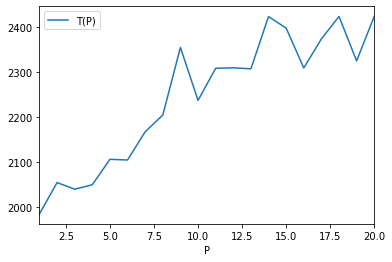

In [70]:
#Weak Scalability: N=10^8

df = pandas.read_csv('mpi-pi_WEAK.csv',
                     delimiter=";",
                     float_precision='round_trip',
                    names=['Rank', 'P', 'T(P)','N'])

idx = df.groupby(['N','P'])['T(P)'].transform(max) == df['T(P)']
weak_df = df[idx]

df_t1 = pandas.read_csv('')

print(weak_df)


counter = 0
fh = figure(figsize=(15,10))
fh.suptitle("Weak Scaling")
#weak_df.plot(x='P',y='T(P)')
#savefig("weakScalingPi.png")



<Figure size 1080x720 with 0 Axes>

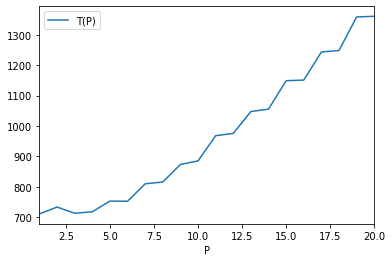

In [69]:
#Weak Scalability Partial Sum: data related to N=10^8
#We might observe this behaviour due to the increasing communication time,
#which would have a lot of sense given our model

df = pandas.read_csv('mpiPartialSumSerial_WEAK.csv',
                     delimiter=";",
                     float_precision='round_trip',
                    names=['Rank', 'P', 'T(P)','N'])

idx = df.groupby(['N','P'])['T(P)'].transform(max) == df['T(P)']
weak_df = df[idx]

#print(weak_df)


counter = 0
fh = figure(figsize=(15,10))
fh.suptitle("Weak Scaling")

weak_df.plot(x='P',y='T(P)')
savefig("weakScalingSum.png")

     Rank   P       T(P)           N
0       1   1    7.49803     1000000
1       0   2    4.56905     1000000
3       0   3    3.03817     1000000
6       0   4    2.32410     1000000
12      2   5    2.09498     1000000
..    ...  ..        ...         ...
753     3  16  783.33402  1000000000
766     0  17  751.53613  1000000000
783     0  18  769.72604  1000000000
801     0  19  730.69692  1000000000
833    13  20  759.39703  1000000000

[80 rows x 4 columns]


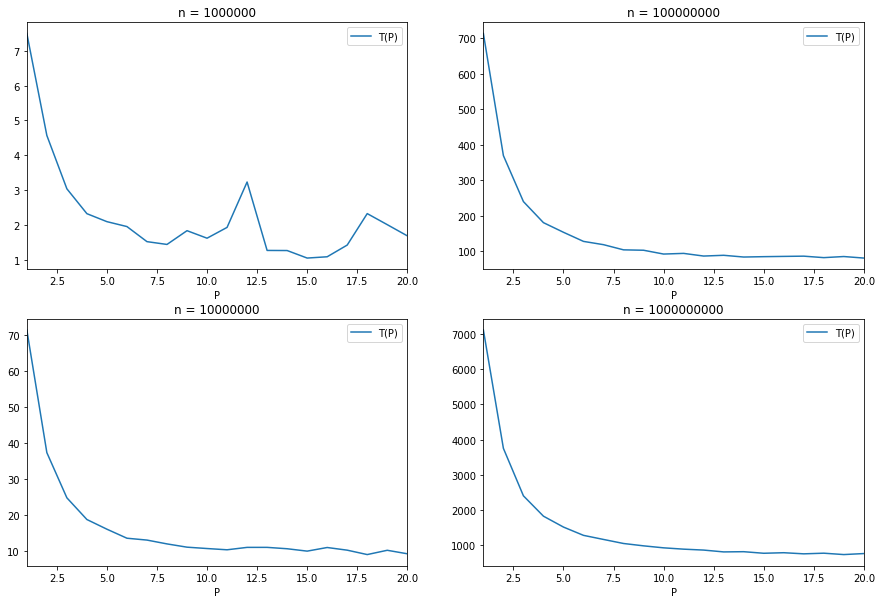

<Figure size 1080x720 with 0 Axes>

In [67]:
#Strong scaling serial sum plots
import pandas

df = pandas.read_csv('mpiPartialSumSerial_STRONG.csv',
                     delimiter=";",
                     float_precision='round_trip',
                    names=['Rank', 'P', 'T(P)','N'])

#print(df)
#We extract the maximum walltime for every P for a fixed N
idx = df.groupby(['N','P'])['T(P)'].transform(max) == df['T(P)']
strong_df = df[idx]

print(strong_df)


counter = 0
fh, axes = subplots(nrows=2, ncols=2)
fh = figure(figsize=(15,10))
fh.suptitle("Strong Scaling")
for i in strong_df.N.unique():
    #ax = fh.add_subplot(2,2,counter)
    k_df = strong_df.loc[strong_df['N'] == i]
    k_df = k_df.astype(float)
    k_df.plot(figsize=(15,10), x = 'P', y = 'T(P)', title="n = " + str(i), ax=axes[counter%2, counter//2])
    counter += 1
    
    #plt = k_df.plot(x = 'P', y = 'T(P)', kind='scatter', title="n = " + str(i))
    #counter += 1
    #savefig("plt.pdf")
#savefig("plt.png")


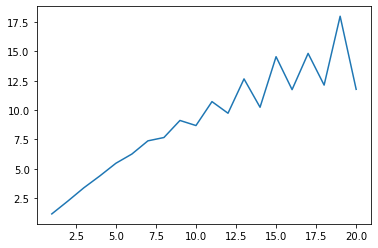

In [93]:
#Plotting practical speedup for serial sum parallel algorithm

df = pandas.read_csv('mpiPartialSumSerial_STRONG.csv.times',
                     delimiter=";",
                     float_precision='round_trip',
                    names=['Time', 'P', 'T','N'])

df_t1 = pandas.read_csv('partialSumSerial_STRONG.csv',
                       delimiter=";",
                     float_precision='round_trip',
                    names=['Bla', 'P', 'T','N'])

#print(df.N.unique())
df = df.loc[df['N'] == 1000000000]
read_time = df.loc[df['Time'] == 'T_READ']
P = read_time['P'].values
read_time = read_time['T'].values.astype(float)*1000
comm_time = df.loc[df['Time'] == 'T_COMM']
comm_time = comm_time['T'].values.astype(float)*1000
comp_time = df.loc[df['Time'] == 'T_COMP']
comp_time = comp_time['T'].values.astype(float)*1000


df_t1 = df_t1.loc[df_t1['N'] == 1000000000 ]
#print(P)
#print(df)
#print(read_time)
#print(df_t1)

def Speedup_practical(T_1,T_comp,T_read,T_comm):
    T_P = T_read + T_comm + T_comp
    return T_1/T_P


plot(P,Speedup_practical(df_t1['T'].values, comp_time, read_time, comm_time))
